## **The effect of academic studies on relationships**
Avital Akerman

In this notebook an analysis was made of the graeds of an engineering student and science education students in 2019 
The data is from https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation

In the data the varibles are :


* Student ID
* 1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
* 2- Sex (1: female, 2: male)
* 3- Graduated high-school type: (1: private, 2: state, 3: other)
* 4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
* 5- Additional work: (1: Yes, 2: No)
* 6- Regular artistic or sports activity: (1: Yes, 2: No)
* 7- Do you have a partner: (1: Yes, 2: No)
* 8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
* 9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
* 10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
* 11- Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* 12- Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* 13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
* 14- Parental status: (1: married, 2: divorced, 3: died - one of them or both) ***Listed as "Kids"…woops
* 15- Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
* 16- Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
* 17- Weekly study hours: (1: None, 2: < 5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
* 18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
* 19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
* 20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
* 21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
* 22- Attendance to classes (1: always, 2: sometimes, 3: never)
* 23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
* 24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
* 25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
* 26- Listening in classes: (1: never, 2: sometimes, 3: always)
* 27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
* 28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
* 29- Cumulative grade point average in the last semester (/4.00): (1: < 2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
* 30- Expected Cumulative grade point average in the graduation (/4.00): (1: < 2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
* 31- Course ID
* 32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

 ***My main question is whether I can predict the relationship status of the students according to this data.***


#Explore the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
##  importing required libraries
import pandas as pd
from google.colab import data_table
import seaborn as sns
import math
import numpy as np
from scipy.stats import zscore
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from scipy.stats import chi2_contingency
import sklearn
from sklearn import metrics
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Mounted at /content/drive


In [ ]:
 pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 7.9 MB/s 


In [ ]:
import phik
from phik import resources, report

In [ ]:

original_df = pd.read_csv("/content/drive/MyDrive/Data_sicence/student_prediction.csv")  ##/content/drive/MyDrive/Data_sicence/student_prediction.csv
original_df .head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
#Modify the headings so that the first letter of each column is a lowercase letter
original_df.columns = [x.lower() for x in original_df.columns]
original_df_remove_id=original_df.drop("studentid",axis=1)
#setting the index to be the number of the student insted of the studentid 
index=[*range(1,len(original_df["studentid"]),1)]

original_df_remove_id=original_df_remove_id.reindex(index)
#making the values in the datafream more understandable
attr_map = {
    'age': {
        1: '18-21',
        2: '22-25',
        3: 'Above 26'
    },
    'gender': {1: 'Female', 2: 'Male'},
    'hs_type': {
        1: 'Private',
        2: 'State',
        3: 'Other'
    },
    'scholarship': {
        1: '0%',
        2: '25%',
        3: '50%',
        4: '75%',
        5: '100%'
    }, 
    'work': {1: 'Yes', 2: 'No'}, 
    'activity': {1: 'Yes', 2: 'No'},
    'partner': {1: 'Yes', 2: 'No'},
    'salary': {
        1: '$135-200',
        2: '$201-270',
        3: '$271-340',
        4: '$341-410',
        5: 'Above $410',
    },
    'transport': {
        1: 'Bus',
        2: 'Private car/taxi',
        3: 'Bicycle',
        4: 'Other'
    }, 
    'living': {
        1: 'Rental',
        2: 'Dormitory',
        3: 'With family',
        4: 'Other'
    },
    'mother_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'father_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    }, 
    'kids': {
        1: 'Married',
        2: 'Divorced',
        3: 'Died - one of them or both'
    },
    'mother_job': {
        1: 'Retired',
        2: 'Housewife',
        3: 'Government officer',
        4: 'Private sector employee',
        5: 'Self-employment',
        6: 'Other'
    },
    'father_job': {
        1: 'Retired',
        2: 'Government officer',
        3: 'Private sector employee',
        4: 'Self-employment',
        5: 'Other'
    },
    'study_hrs': {
        1: 'None',
        2: '<5 hours',
        3: '6-10 hours',
        4: '11-20 hours',
        5: 'More than 20 hours'
    },
    'read_freq': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'read_freq_sci': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'attend_dept': {1: 'Yes', 2: 'No'},
    'impact': {
        1: 'Positive',
        2: 'Negative',
        3: 'Neutral'
    },
    'attend': {1: 'Yes', 2: 'No'},
    'prep_study': {
        1: 'Alone',
        2: 'With friends',
        3: 'Not applicable'
    },
    'prep_exam': {
        1: 'Closest date to the exam', 
        2: 'Regularly during the semester',
        3: 'Never'
    },
    'notes': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'listens': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'likes_discuss': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'classroom': {
        1: 'Not useful',
        2: 'Useful',
        3: 'Not applicable'
    },
    'cuml_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'exp_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'grade': {
        0:" < 60",
        1: '60-64',
        2: '65-69',
        3: '70-74',
        4: '75-79',
        5: '80-84',
        6: '85-89',
        7: '90-100'
    },
    'course id': dict({i:str(i) for i in range(1, 10)}),
    '#_siblings': dict({i:str(i) for i in range(1, 6)})

}

#copying the datafream
df_copy = original_df.copy()

#Change the number of siblings from a maximum of 5 to 5 siblings or more

for col in df_copy.columns.tolist():
    if col not in list(attr_map.keys()):
        continue
    if col == '#_siblings':
        df_copy[col].apply(lambda x: '5 or above' if x == 5 else str(x))
    else:
        df_copy[col] = df_copy[col].map(attr_map[col])
df_copy.head()

,studentid,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,...,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,60-64
1,STUDENT2,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,60-64
2,STUDENT3,22-25,Male,State,50%,No,No,No,$201-270,Other,...,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,60-64
3,STUDENT4,18-21,Female,Private,50%,Yes,No,Yes,$201-270,Bus,...,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,60-64
4,STUDENT5,22-25,Male,Private,50%,No,No,Yes,$271-340,Bus,...,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,60-64


In coding the greads, I wwanted to make it easier for Israeli students to understand. So I converted the letter greads to numarical range of graeds, like the scoring method accepted in Israel.


The salary in dollars is not defined enough.
The salary can be a future salary after completing the degree or a salary of temporary work during the degree. 
If I treat this salary as a salary in the thousands of dollars after the degree, it does not make sense.Because the average salary per year for engineers in the United States is 91000$.In calculating working days per year it can be assumed that it can be a daily salary after the degree or a weekly salary during temporary work at the degree.




In [ ]:
print(f'The data has {original_df.shape[0]} students and {original_df.shape[1]} features')

The data has 145 students and 33 features


In [ ]:
df_copy.describe()

,#_siblings,course id
count,145.000000,145.000000
mean,2.806897,4.131034
std,1.360640,3.260145
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,3.000000
75%,4.000000,7.000000
max,5.000000,9.000000


In [ ]:
#check duplicate
duplicate = original_df.duplicated().sum()
print("The number of duplicate Rows =",duplicate)

## check for null values
n_null = original_df.isnull().sum().sum()
print(' The number of null values = {}'.format(n_null))

The number of duplicate Rows = 0
 The number of null values = 0


**Conclusions:**


There are no null/nan values and no duplicates. I have the data incoded and in more understandable way. So I dont need to clean it or do any further preprocess on the data.

# Checking correlations between variables




Because I have  nominal and ordinary and binary variables in the data we do not have a single correlation that can fit everything. Therefore I need to separate all types of variables in order to calculate a correlation between them all.









In [ ]:
#nominal variabels
num_df=original_df[['classroom','prep_exam','prep_study','impact','father_job','mother_job','kids','living','transport','hs_type']]

#binary variables
binary_df=original_df[["partner",'attend','attend_dept','activity','work','gender']]

#Ordinal variables
ordinal_df=original_df[['grade','exp_gpa','cuml_gpa','likes_discuss','listens','notes','read_freq_sci','study_hrs','father_edu','mother_edu','salary','scholarship','age']]

In [ ]:
#Setting font for the graphs
sns.set_theme(style="whitegrid")
palette = sns.color_palette('Set2')
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 'larger'}


Correlation between ordinal variables using Kendall method

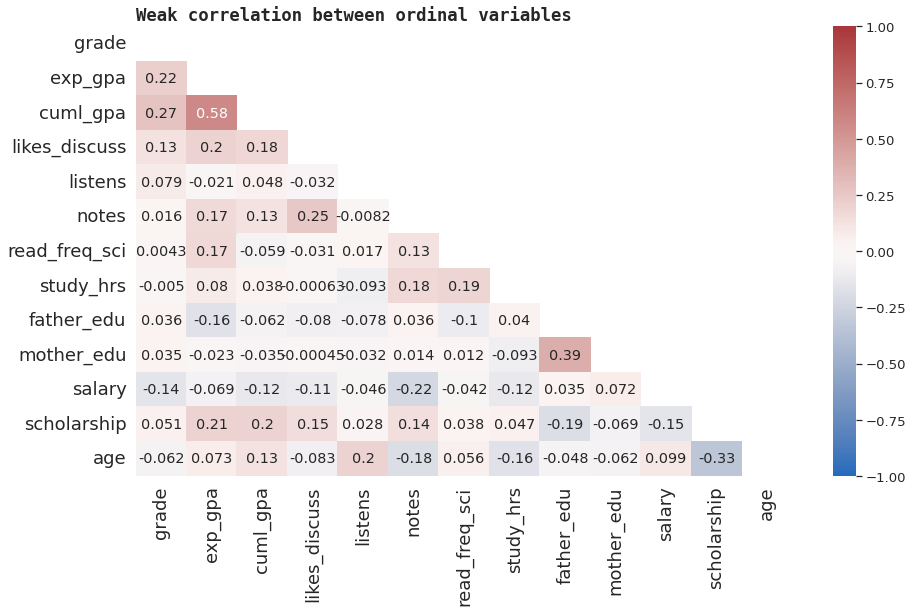

In [ ]:
corr = ordinal_df.corr(method='kendall')
sns.set(font_scale = 1.2)
rcParams['figure.figsize'] = 14.7,8.27

      
mask = np.zeros_like(corr , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  ax = sns.heatmap(corr , mask=mask,vmin=-1., vmax=1,cmap="vlag", annot=True)
plt.title("Weak correlation between ordinal variables " ,fontdict = font, loc = 'left')
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18) 
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.show()

**Conclusions:**

It can be seen that between the ordinal variables there is no high correlation (whether positive or negative) other than an estimated grade  average for this semester(exp_gpa) with a grade average of a previous semester(cuml_gpa) (correlation 0.58).
And between father education and mother education (0.39)


Text(0.0, 1.0, 'Weak correlation between binary variables ')

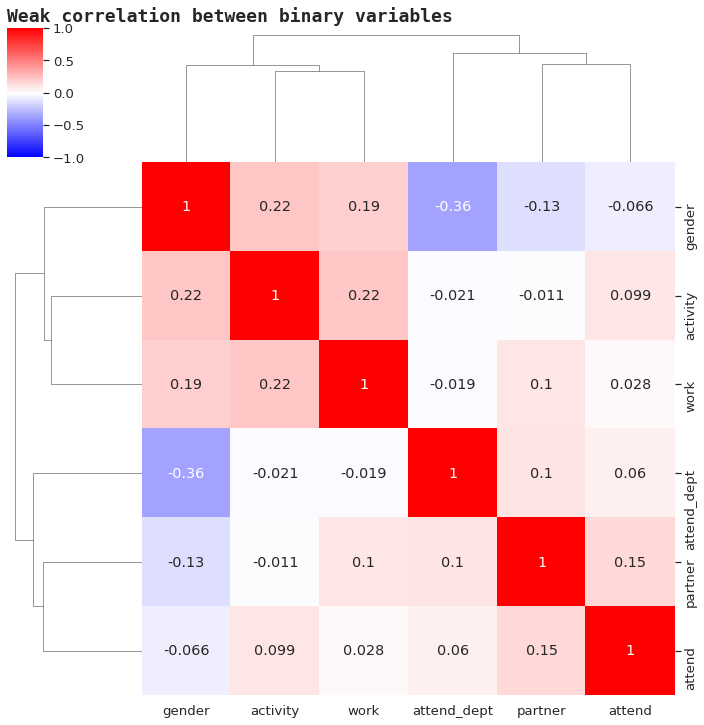

In [ ]:
c=binary_df.corr()
axe=sns.clustermap(c, vmin=-1, vmax=1, cmap='bwr',annot=True)
sns.set(font_scale = 1.2)
plt.title("Weak correlation between binary variables " ,fontdict = font, loc = 'left', fontsize =18)


In [ ]:
original_df.phik_matrix()

interval columns not set, guessing: ['age', 'gender', 'hs_type', 'scholarship', 'work', 'activity', 'partner', 'salary', 'transport', 'living', 'mother_edu', 'father_edu', '#_siblings', 'kids', 'mother_job', 'father_job', 'study_hrs', 'read_freq', 'read_freq_sci', 'attend_dept', 'impact', 'attend', 'prep_study', 'prep_exam', 'notes', 'listens', 'likes_discuss', 'classroom', 'cuml_gpa', 'exp_gpa', 'course id', 'grade']


,studentid,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,...,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade
studentid,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
age,1.0,1.000000,0.076943,0.539463,0.337088,0.112429,0.049669,0.000000,0.082258,0.049073,...,0.223460,0.637011,0.433728,0.394351,0.412716,0.528265,0.138596,0.174624,0.601636,0.343757
gender,1.0,0.076943,1.000000,0.056071,0.115689,0.241461,0.298991,0.116332,0.000000,0.375245,...,0.067077,0.023375,0.000000,0.100802,0.000000,0.116502,0.150662,0.465177,0.578512,0.495669
hs_type,1.0,0.539463,0.056071,1.000000,0.102531,0.062247,0.000000,0.008951,0.268619,0.210417,...,0.270060,0.272862,0.000000,0.000000,0.124374,0.000000,0.138503,0.000000,0.275826,0.000000
scholarship,1.0,0.337088,0.115689,0.102531,1.000000,0.000000,0.095205,0.000000,0.311395,0.000000,...,0.265755,0.000000,0.119210,0.000000,0.181921,0.169080,0.117691,0.143967,0.591556,0.290619
work,1.0,0.112429,0.241461,0.062247,0.000000,1.000000,0.291740,0.030307,0.066157,0.275928,...,0.075943,0.134556,0.053510,0.144619,0.010986,0.000000,0.000000,0.000000,0.000000,0.184453
activity,1.0,0.049669,0.298991,0.000000,0.095205,0.291740,1.000000,0.000000,0.103312,0.288654,...,0.026598,0.114594,0.000000,0.000000,0.000000,0.052514,0.000000,0.000438,0.323440,0.165742
partner,1.0,0.000000,0.116332,0.008951,0.000000,0.030307,0.000000,1.000000,0.000000,0.323923,...,0.094470,0.054427,0.000000,0.000000,0.031369,0.000000,0.000000,0.000000,0.000000,0.207612
salary,1.0,0.082258,0.000000,0.268619,0.311395,0.066157,0.103312,0.000000,1.000000,0.062983,...,0.262048,0.298141,0.245014,0.000000,0.204875,0.000000,0.164328,0.000000,0.032959,0.078562
transport,1.0,0.049073,0.375245,0.210417,0.000000,0.275928,0.288654,0.323923,0.062983,1.000000,...,0.140081,0.000000,0.000000,0.000000,0.000000,0.000000,0.035288,0.260382,0.183395,0.265852


**Conclusions:**

No high correlation (whether negative or positive) can be seen between the binary variables. The highest correlation can be seen between gender and attendance at classes (negative correlation of -0.36)

For the nominal varibels we will build of the Cramer's V function

In [ ]:

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

Building of the matrix

In [ ]:
rows= []

for var1 in num_df:
  col = []
  for var2 in num_df :
    cramers =cramers_V(num_df[var1], num_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns =num_df.columns, index =num_df.columns)



df

,classroom,prep_exam,prep_study,impact,father_job,mother_job,kids,living,transport,hs_type
classroom,1.00,0.03,0.05,0.01,0.03,0.02,0.00,0.02,0.02,0.01
prep_exam,0.03,1.00,0.09,0.00,0.03,0.01,0.15,0.02,0.01,0.02
prep_study,0.05,0.09,1.00,0.04,0.03,0.04,0.02,0.04,0.04,0.02
impact,0.01,0.00,0.04,1.00,0.01,0.02,0.00,0.00,0.05,0.03
father_job,0.03,0.03,0.03,0.01,1.00,0.07,0.08,0.03,0.04,0.03
mother_job,0.02,0.01,0.04,0.02,0.07,1.00,0.04,0.06,0.09,0.03
kids,0.00,0.15,0.02,0.00,0.08,0.04,1.00,0.01,0.02,0.01
living,0.02,0.02,0.04,0.00,0.03,0.06,0.01,1.00,0.16,0.02
transport,0.02,0.01,0.04,0.05,0.04,0.09,0.02,0.16,1.00,0.06
hs_type,0.01,0.02,0.02,0.03,0.03,0.03,0.01,0.02,0.06,1.00


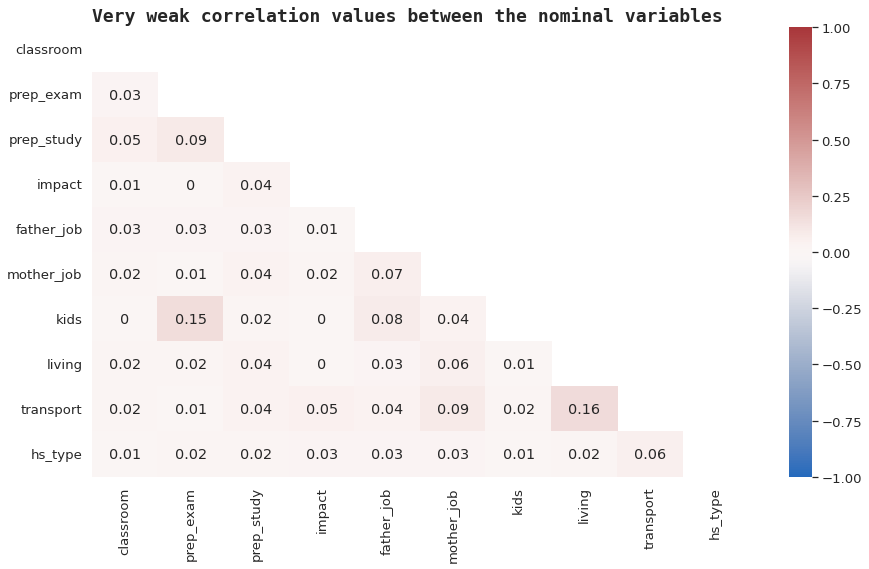

In [ ]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=-1, vmax=1,cmap="vlag",annot=True )
plt.title("Very weak correlation values between the nominal variables", fontdict = font, loc = 'left',fontsize =18)
plt.show()


**Conclusions:**

No high correlation (whether negative or positive) can be seen between the nominal variables.


#What affects a relationships?

In [ ]:
#Definition of useful functions


#Function for writing values ​​over the corresponding column in a bar graph

def put_bar_chart_labels(x_lst, y_lst, labels):
  for x, y, label in zip(x_lst, y_lst, labels):
    plt.text(x, y, label)   

#Function for Calculating the percentage that are in a pair from each category in each variable
def percent_of_partner_out_of_var_total(var,df_copy,attr_map):
  plot_dct_Y = {}
  plot_dct_N = {}
  for i in attr_map[var].values():
    total = len(df_copy[df_copy[var] == i])
    if total ==0 :
      total=1
    temp = df_copy[df_copy["partner"] =='No'].copy()
    no = len(temp[temp[var] == i])
    no = no/total*100
    plot_dct_N[str(i) ] = no
    temp = df_copy[df_copy["partner"] == 'Yes' ].copy()
    yes = len(temp[temp[var] == i])
    yes = yes/total*100
    plot_dct_Y[str(i) ] = yes
  return plot_dct_N , plot_dct_Y


#function for generating data frames for percentage bar plots

def frame_Y_N(var,df_copy,attr_map):
  dct_N, dct_Y = percent_of_partner_out_of_var_total(var,df_copy,attr_map)
  plot_frame_N = pd.DataFrame(dct_N, index = dct_N.keys())
  plot_frame_Y = pd.DataFrame(dct_Y, index = dct_Y.keys())
  plot_frame_Y = plot_frame_Y.swapaxes("index", "columns")
  plot_frame_N= plot_frame_N.swapaxes("index", "columns")
  plot_frame_Y = plot_frame_Y[plot_frame_Y.columns[0]].copy()
  plot_frame_N = plot_frame_N[plot_frame_N.columns[0]].copy()
  return plot_frame_N, plot_frame_Y



def permutation_test_for_P_value(var,plot_frame_N , plot_frame_Y,df_copy,attr_map):
  data = df_copy[var].unique()
  n=len(data)
  
  abs_diff=np.abs(plot_frame_N-plot_frame_Y)


  runs=1000
  sample_size = len(df_copy[var].values)
  dic={}
  for parmater in data:
    name=parmater+"_diffs"
    name=np.zeros(runs)
    dic[parmater]=name

  for ii in range(runs):
    np.random.shuffle(df_copy[var])
    plot_frame_N , plot_frame_Y = frame_Y_N(var,df_copy,attr_map)

  
    d=np.abs(plot_frame_Y-plot_frame_N)
    
    
    for index, value in d.items() :
      value=int(value)
      for key,value1 in dic.items() :

        if index in key :
          value1[ii]=value
    # compute our p-value
    dic2={}
    for key,value in dic.items() :
      
      for index, value1 in abs_diff.items():
        if index in key:
          larger = np.where(value>=value1, 1, 0)
          p_val = np.sum(larger)/runs
          dic2[index]=p_val
  return dic2
      

### Parameters showing investment in education

After getting a general sense for the data, I decided to look at parameters that show investment in studies. on the assumption that investing in studies takes a lot of time and can causes a lot of mental stress. That can affect the possibility of investing in something that requires time and mental investment such as a relationship.


I took the parameters:grades,Cumulative grade average in the last semester,  Preparation to midterm exams(test study time) and Attendance in classes. I didnt take the expected GPA 
because of the high positive correlation it has with the GPA of the previous semester. It seems unnecessary to me to take these two parameters together.


I looked at the distribution of each of the variables in the population, in addition to the percentages of students in arelationship in each category in the variable. I calculated the P value for each category, the test statistic was the difference between those who are in a relationship and those who are not.I used permutation and two tail test. 


The H0 :There is no difference between those who are in a relationship and those who are not in each category.
  

Text(0.0, 1.0, 'Distribution of partner variable in our data ')

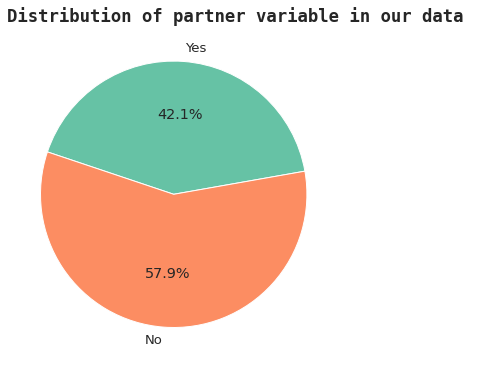

In [ ]:
#Look at the distribution of the presence of spouses in our data
order = list(attr_map['partner'].values())
data = df_copy['partner'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)
plt.title("Distribution of partner variable in our data ", fontdict = font, loc = 'left')


It can be seen that there are more students in our data who are not in a relationship than those who are in a relationship.

We are interested in the following variables: grades,Cumulative grade point average in the last semester,  Preparation to midterm exams(test study time), gender, Attendance to classes,Transportation to the university,Accommodation type in Cyprus and Weekly study hours. 



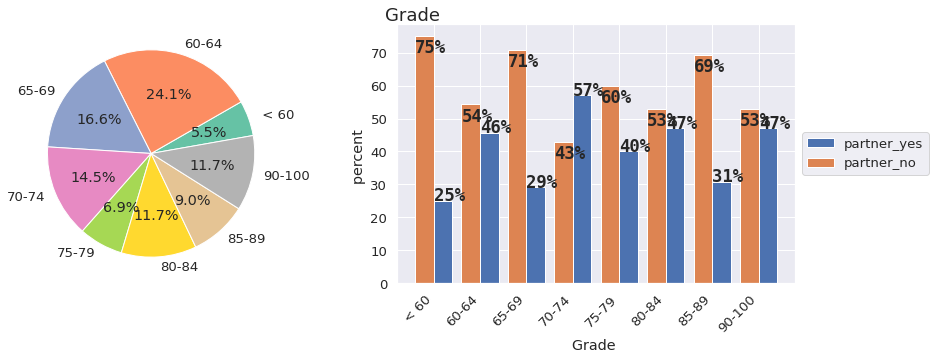

In [ ]:
#Impact of grades on a partner

order = list(attr_map['grade'].values())
data = df_copy['grade'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('grade')['partner'].count()
ls_data=list(data)
fig.suptitle('Grade', fontsize=18,ha='right',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('grade',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent %")
plt.xlabel("Grade ")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:

dic2=permutation_test_for_P_value ('grade',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha}.")
for key,value in dic2.items() : 
  print(f'The p-value for {key} is {value}.')


The critical P value is 0.00625.
The p-value for 65-69 is 0.008.
The p-value for 80-84 is 0.693.
The p-value for 70-74 is 0.74.
The p-value for 85-89 is 0.326.
The p-value for 60-64 is 0.216.
The p-value for 75-79 is 0.764.
The p-value for 90-100 is 0.671.
The p-value for  < 60 is 0.352.



**Conclusion:**




It can be seen that in most grades there is a larger percentage of students who are not in a relationship. The big difference can be seen in grades of under 60 where there is an absolute majority of students who are in a relationship and 65-69 where there are a majority of students who are not in a relationship.


According to the revised alpha value it can be seen that only students who have the grade range of 65-69 have a statistically significant difference.Students in this grade range are more likely not to be in a relationship. 

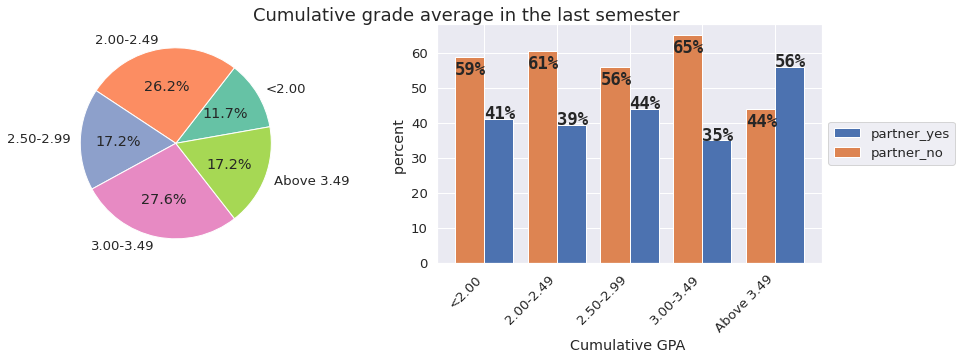

In [ ]:
#Impact of cuml_gpa on a partner

order = list(attr_map['cuml_gpa'].values())
data = df_copy['cuml_gpa'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('cuml_gpa')['partner'].count()
ls_data=list(data)

fig.suptitle('Cumulative grade average in the last semester', fontsize=18,ha='center',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('cuml_gpa',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent % ")
plt.xlabel("Cumulative GPA ")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
dic2=permutation_test_for_P_value ('cuml_gpa',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.01.
The p-value for <2.00 is 0.427
The p-value for 2.00-2.49 is 0.275
The p-value for 2.50-2.99 is 0.52
The p-value for 3.00-3.49 is 0.178
The p-value for Above 3.49 is 0.557



**Conclusion:**



It can be seen that most GPA ranges have a higher percentage of students who are not in a relationship, other than the students with the highest average.These students are more in a relationship than not.

From the revised alpha value it can be seen that none of these differences are statistically significant. Therefore the grade average(GPA) of a previous semester has no significant effect on the marital status of the students.

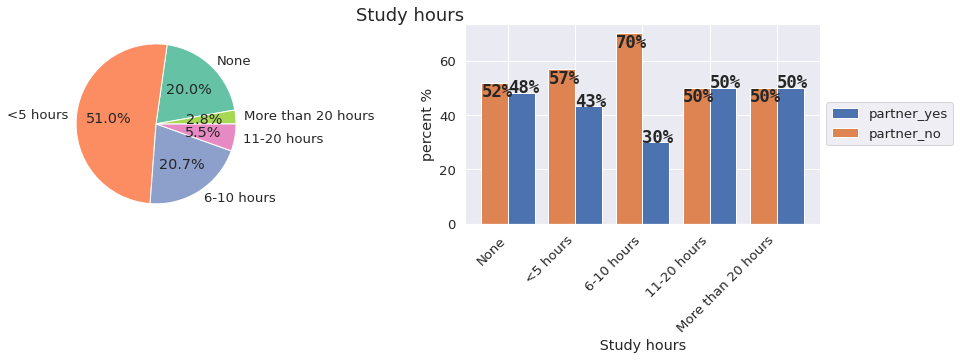

In [ ]:
#Impact of study_hrs on a partner

order = list(attr_map['study_hrs'].values())
data = df_copy['study_hrs'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('study_hrs')['partner'].count()
ls_data=list(data)

fig.suptitle('Study hours', fontsize=18,ha='right',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('study_hrs',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent %")
plt.xlabel(" Study hours ")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
dic2=permutation_test_for_P_value ('study_hrs',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.01.
The p-value for 6-10 hours is 0.101
The p-value for <5 hours is 0.568
The p-value for None is 0.793
The p-value for More than 20 hours is 1.0
The p-value for 11-20 hours is 1.0


**Conclusion:**

It can be seen that when study hours exceed 10 hours there is an equal percentage of students who are in a relationship and those who are not. But the percentage of students studying over 10 hours a week is low in the population.
When study hours are below 10 hours there is a higher percentage of students who are not in a relationship, with the largest difference being found in the range of 6-10 study hours.



From the revised alpha value it can be seen that none of these differences are statistically significant. Presumably there is no effect of the weeks of study hours with being in a relationship.

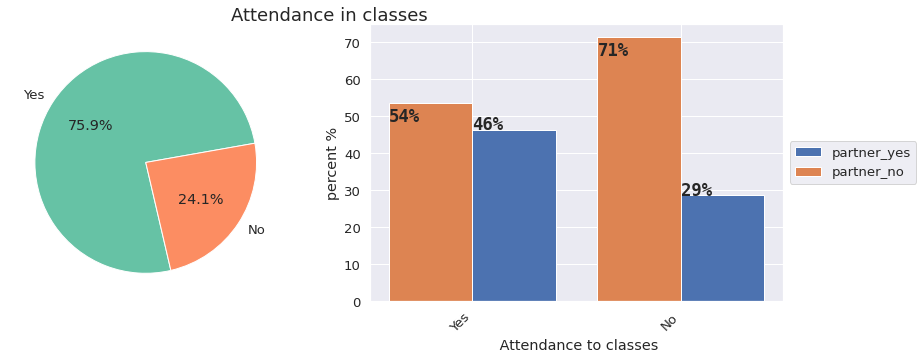

In [ ]:

#Impact of Attendance in classes on a partner

order = list(attr_map['attend'].values())
data = df_copy['attend'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('attend')['partner'].count()
ls_data=list(data)

fig.suptitle('Attendance in classes', fontsize=18,ha='right',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('attend',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent %")
plt.xlabel(" Attendance to classes")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
dic2=permutation_test_for_P_value ('attend',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.025.
The p-value for Yes is 0.958
The p-value for No is 0.017


**Conclusion:**

It can be seen that most of the students in our data do go to classes. When those who go to classes have a smaller difference in percentage in favor of lack of relationship.





After alpha correction it can be seen that the difference is statistically significant in the group of students who do not go to classes.  Students who do not go to classes have a higher percentage of lack of relationship.

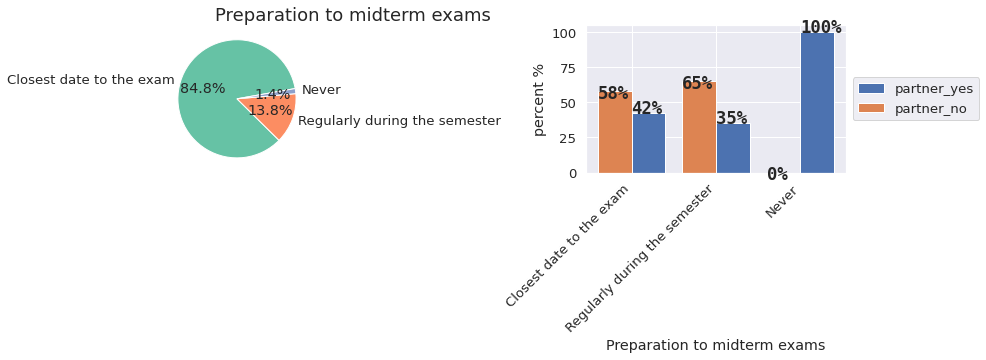

In [ ]:
#Impact of prep_exam on a partner

order = list(attr_map['prep_exam'].values())
data = df_copy['prep_exam'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('prep_exam')['partner'].count()
ls_data=list(data)

fig.suptitle('Preparation to midterm exams', fontsize=18,ha='right',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('prep_exam',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent %")
plt.xlabel("Preparation to midterm exams")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [ ]:
dic2=permutation_test_for_P_value ('prep_exam',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha:.3f}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.017.
The p-value for Closest date to the exam is 0.456
The p-value for Regularly during the semester is 0.349
The p-value for Never is 0.509



**Conclusions:**


It can be seen that those who have not prepared for the midterms are all in a relationship. But their percentage in the data is very small.
These studied during the entire semester have a higher percentage of students who are not in a relationship than the students who studied only prior to the exam. But their percentage is smaller in the data. Most of the data is students studying for the midterm exam.




From the revised alpha value it can be seen that none of these differences are statistically significant. Presumably there is no effect of the preparation to midterm exams with being in a relationship.

### Does living with parents have an effect on relationships?


I wanted to check if the residence affects being in a relationship. Especially whether living with parents affects being in a relationship. My assumption was that when the student lives with the parents there is less privacy. In addition, there is a constant intervention in the student's life on the part of the family. Things that can lower the chance of a relationship.

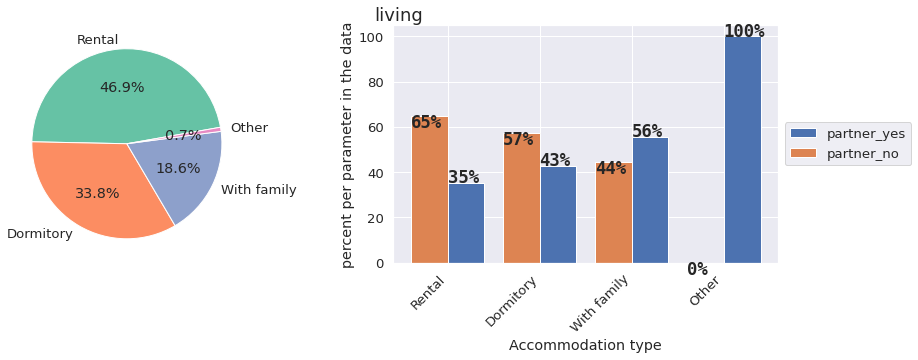

In [ ]:

#Impact of living on a partner

order = list(attr_map['living'].values())
data = df_copy['living'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('living')['partner'].count()
ls_data=list(data)

fig.suptitle('living', fontsize=18,ha='right',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('living',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent per parameter in the data")
plt.xlabel("Accommodation type")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
dic2=permutation_test_for_P_value ('living',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.0125.
The p-value for Rental is 0.039
The p-value for Dormitory is 0.477
The p-value for Other is 1.0
The p-value for With family is 0.566


**Conclusion:**


It can be seen that all the students living in the "other" living arrangement are in a relationship. But this is a small percentage of our data.

Those who live with the family have a higher percentage of students in relationships. While those who live in rental and dormitories have a high percentage of lack of intimacy.

From the revised alpha value it can be seen that none of these differences are statistically significant. Therefore, it can be assumed that the living arrangement of the students does not affect their relationship status.

### Does transportation to campus affects relationships?

I wanted to see if  transportation to campus affects the studentsrelationship status. My assumption was that when the student is close to campus and arrives on foot\ bike, he saves a lot of time in the day that he can invest in a relationships.

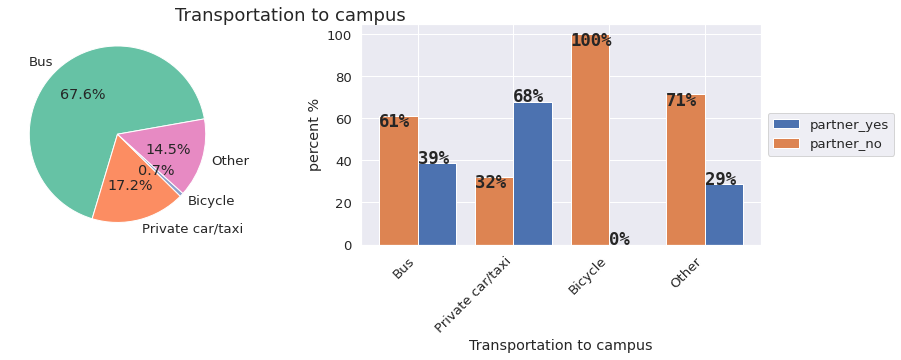

In [ ]:


#Impact of transport on a partner

order = list(attr_map['transport'].values())
data = df_copy['transport'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('transport')['partner'].count()
ls_data=list(data)

fig.suptitle('Transportation to campus', fontsize=18,ha='right',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('transport',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent %")
plt.xlabel("Transportation to campus")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
dic2=permutation_test_for_P_value ('transport',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.0125.
The p-value for Bus is 0.098
The p-value for Other is 0.054
The p-value for Private car/taxi is 0.174
The p-value for Bicycle is 1.0


**Conclusion:**


It can be seen that everyone who comes to campus by bike is not in a relationship. But this is a small percentage of our data.
In addition, it can be seen that a large percentage of students who come to campus in a private car or taxi are in a relationship. Compared to those who arrive by "other" means of transportation and by bus.


From the revised alpha value it can be seen that none of these differences are statistically significant. Therefore, it can be assumed that there is no effect of the way to campus on the student's relationship status.


### Does student gender affect the chances of being in a relationship?

I wanted to see if the student's gender affects his or her presence in a relationship. Our data was taken from the Faculty of Engineering and Science education. This faculty has a higher percentage of men than women. I was expecting to see a higher percentage of women in relationships because of it.

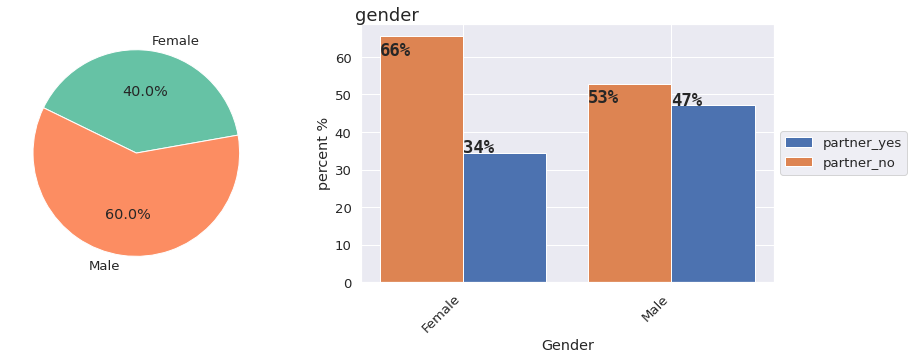

In [ ]:
#Impact of gender on a partner

order = list(attr_map['gender'].values())
data = df_copy['gender'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('gender')['partner'].count()
ls_data=list(data)

fig.suptitle('gender', fontsize=18,ha='right',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('gender',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent %")
plt.xlabel("Gender")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
dic2=permutation_test_for_P_value ('gender',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.025.
The p-value for Male is 0.904
The p-value for Female is 0.047


**Conclusion:**


It can be seen that there are indeed more men than women in our data. It can be seen that there is an equal percentage of men who are in a relationship and those who are not. Compared to women who have a higher percentage of female students who are not in a relationship


From the revised alpha value it can be seen that these two differences are not statistically significant. Therefore, it can be assumed that there is no effect of gender on the marital status of students.

# **Random forest for the relevnt varibales**


It turns out that most of the parameters have no effect with statistical significance on the relationship status of the students. But I wanted to see if a combination of these variables can still predict the relationship status.

In [ ]:
relevent_col=["gender",'prep_exam','transport','living','attend','study_hrs','grade','cuml_gpa']
X=original_df[relevent_col]
Y = original_df.partner.copy()

X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.3)
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.4318181818181818


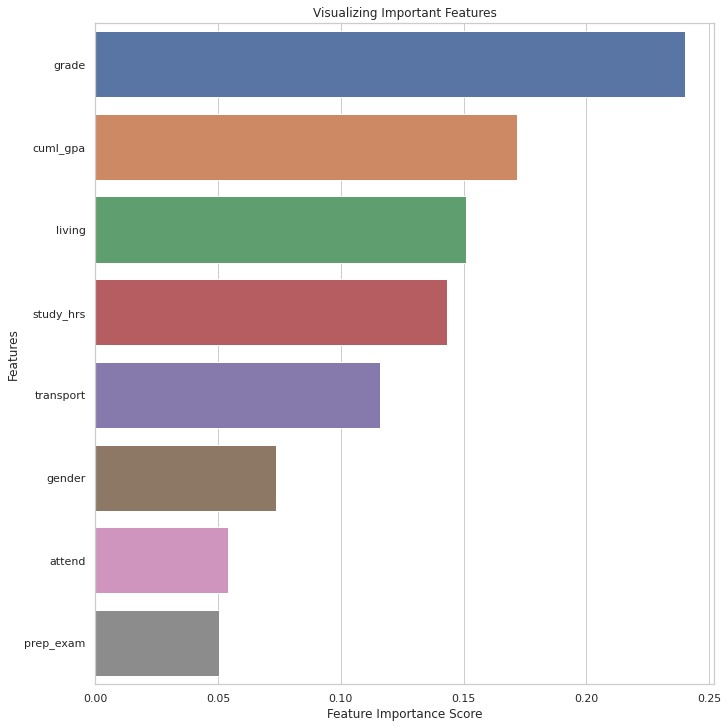

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 10), constrained_layout=True)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


**Conclusions:**


*  
The percentage of accuracy was relatively low, so our data probably does not explain well the presence / absence of a partner.
*   It can be seen that the length of preparation for the test, sex, and attendance at classes have the least effect on whether the student is in a relationship. This is consistent with what we saw earlier.
*   It can be seen that the score has the greatest effect on the presence of spouses. This is consistent with what we saw, there were many score ranges that had a significant P value.

*   The GPA according to the model affects the presence / absence of a partner. When we looked at the P values, we saw that there is an effect on only one range of GPA.

*  It can be seen that the ways of getting to campus, place of residence during school hours and weekly school hours moderately affect the presence / absence of a partner.



# **Random forest for all the dataset**

Now we wanted to see if by reducing the variables we reduced importent information that could help us better predict whether there is a partner or not.
We took all the variables and used random forest.

In [ ]:
X = original_df.drop(["partner","studentid" ], axis =1).copy()
Y = original_df.partner.copy()

X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.3)
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
y_train_pred = clf.predict(X_train)
print("Train accuracy:", metrics.accuracy_score(Y_train, y_train_pred))

Accuracy: 0.6818181818181818
Train accuracy: 1.0


In [ ]:
print(f"Test accuracy:{metrics.accuracy_score(Y_test, y_pred):.3f}")
y_train_pred = clf.predict(X_train)
print("Train accuracy:", metrics.accuracy_score(Y_train, y_train_pred))

Test accuracy:0.682
Train accuracy: 1.0


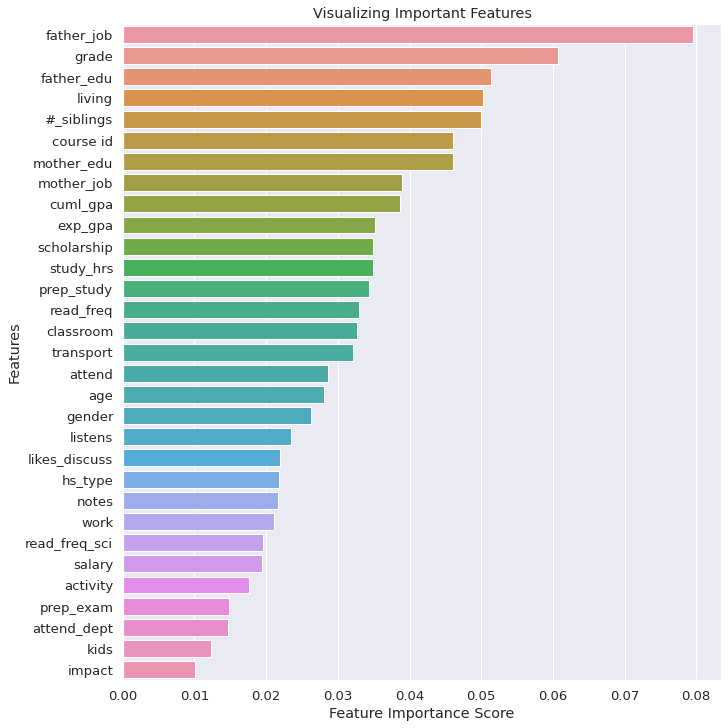

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 10), constrained_layout=True)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


**Conclusions:**




*   We can see that the accuracy has improved but not by much. Therefore, even our data rule does not make it possible to adequately understand the presence of a lack in a partner.
*   In addition, the variable of the greatest importance is the grade followed by a number of siblings, the work of the parents who will not turn to influence in such a significant way.




# **Looking at the new importent varibales**

After seeing what the really important variables are in our data, we would like to look at the variables we have not looked at before.

צריך לכתוב מסקנות להכל כאן 

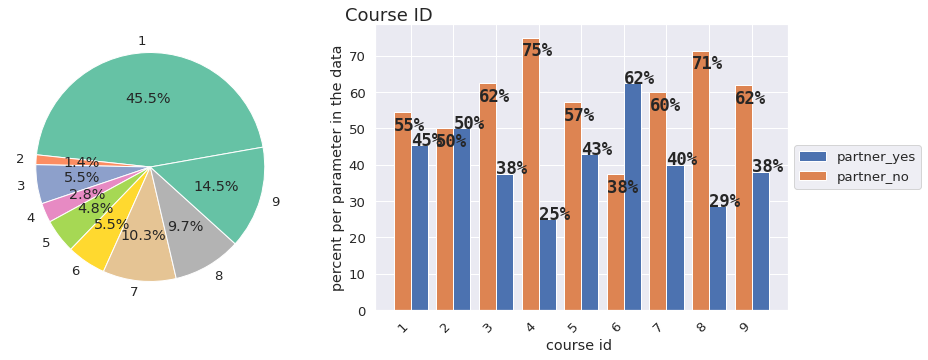

In [ ]:
#Impact of course id on a partner

order = list(attr_map['course id'].values())
data = df_copy['course id'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('course id')['partner'].count()
ls_data=list(data)
fig.suptitle('Course ID', fontsize=18,ha='right',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('course id',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent per parameter in the data")
plt.xlabel("course id ")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
dic2=permutation_test_for_P_value ('course id',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha:.3f}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.006.
The p-value for 4 is 0.634
The p-value for 1 is 0.698
The p-value for 8 is 0.084
The p-value for 3 is 0.757
The p-value for 5 is 0.468
The p-value for 6 is 0.746
The p-value for 7 is 0.645
The p-value for 9 is 0.28
The p-value for 2 is 1.0


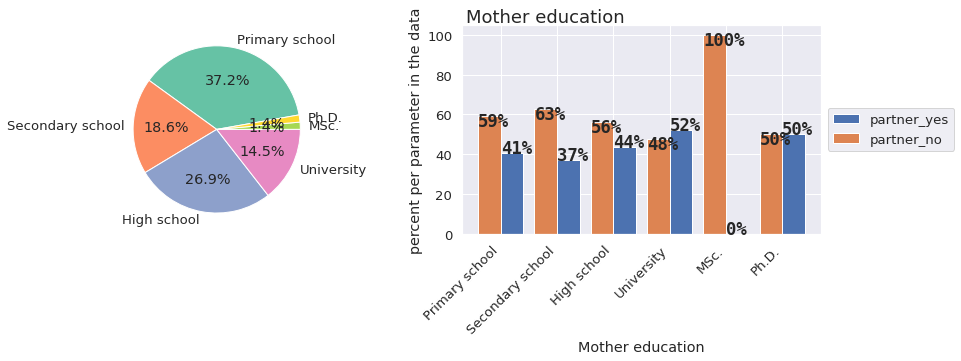

In [ ]:
#Impact of mother_edu on a partner

order = list(attr_map['mother_edu'].values())
data = df_copy['mother_edu'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('mother_edu')['partner'].count()
ls_data=list(data)
fig.suptitle('Mother education', fontsize=18,ha='left',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('mother_edu',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent per parameter in the data")
plt.xlabel("Mother education")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
dic2=permutation_test_for_P_value ('mother_edu',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha:.3f}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.008.
The p-value for Primary school is 0.352
The p-value for Secondary school is 0.192
The p-value for High school is 0.545
The p-value for University is 0.712
The p-value for MSc. is 0.499
The p-value for Ph.D. is 1.0


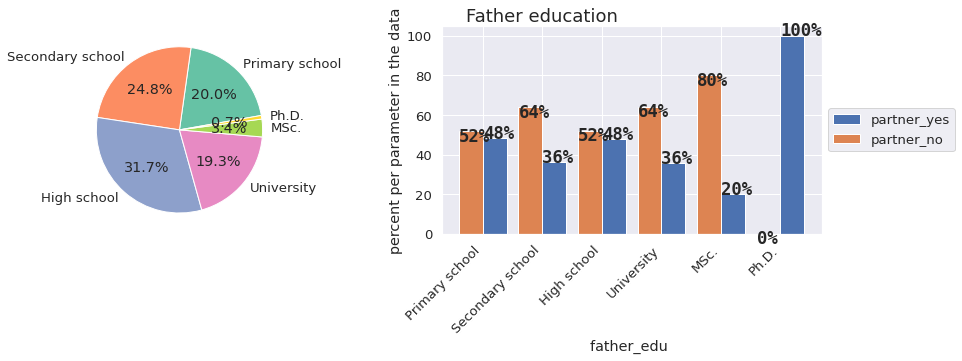

In [ ]:
#Impact of father_edu on a partner

order = list(attr_map['father_edu'].values())
data = df_copy['father_edu'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('father_edu')['partner'].count()
ls_data=list(data)
fig.suptitle('Father education', fontsize=18,ha='left',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('father_edu',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent per parameter in the data")
plt.xlabel("father_edu ")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [ ]:
dic2=permutation_test_for_P_value ('father_edu',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha:.3f}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.008.
The p-value for Secondary school is 0.154
The p-value for High school is 0.841
The p-value for University is 0.16
The p-value for MSc. is 0.386
The p-value for Primary school is 0.776
The p-value for Ph.D. is 1.0


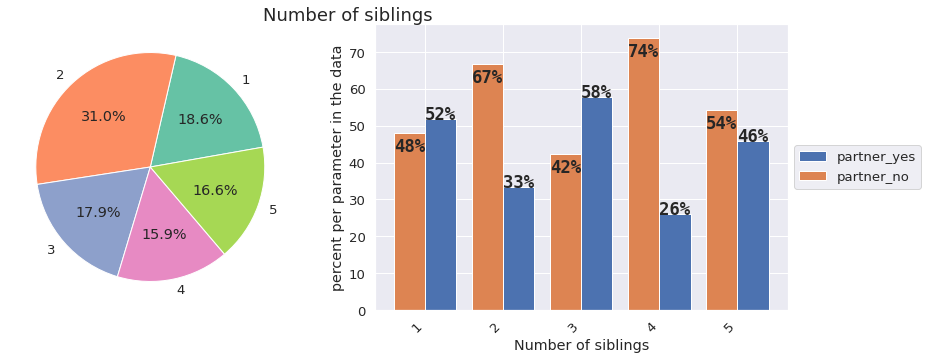

In [ ]:
#Impact of #_siblings on a partner

order = list(attr_map['#_siblings'].values())
data = df_copy['#_siblings'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('#_siblings')['partner'].count()
ls_data=list(data)
fig.suptitle('Number of siblings', fontsize=18,ha='right',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('#_siblings',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent per parameter in the data")
plt.xlabel("Number of siblings")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [ ]:
df_copy2 = df_copy.astype(str)
dic2=permutation_test_for_P_value ('#_siblings',plot_frame_N , plot_frame_Y,df_copy2,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha:.3f}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.010.
The p-value for 3 is 0.443
The p-value for 2 is 0.048
The p-value for 5 is 0.642
The p-value for 1 is 0.775
The p-value for 4 is 0.026


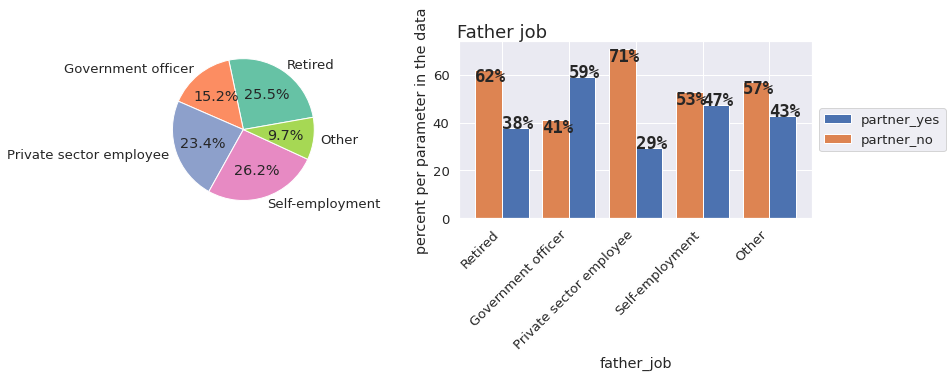

In [ ]:
#Impact of father_job on a partner

order = list(attr_map['father_job'].values())
data = df_copy['father_job'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('father_job')['partner'].count()
ls_data=list(data)
fig.suptitle('Father job', fontsize=18,ha='left',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('father_job',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent per parameter in the data")
plt.xlabel("father_job")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [ ]:
dic2=permutation_test_for_P_value ('father_job',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha:.3f}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.010.
The p-value for Self-employment is 0.754
The p-value for Private sector employee is 0.025
The p-value for Retired is 0.229
The p-value for Other is 0.497
The p-value for Government officer is 0.409


['Retired', 'Housewife', 'Government officer', 'Private sector employee', 'Self-employment', 'Other']


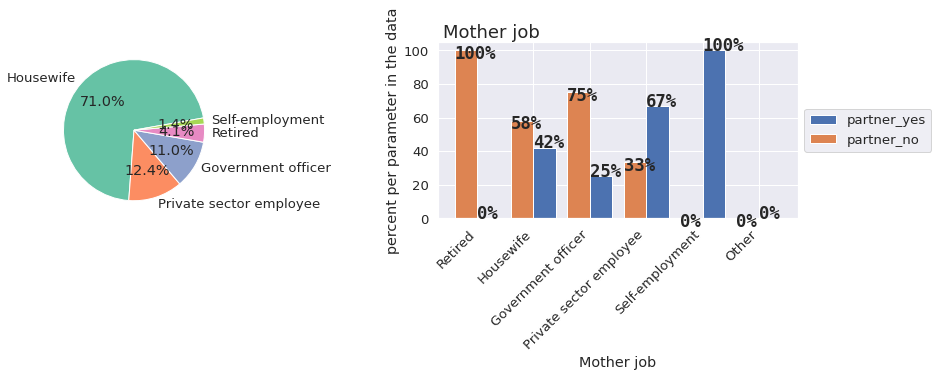

In [ ]:
#Impact of mother_job on a partner

order = list(attr_map['mother_job'].values())
data = df_copy['mother_job'].value_counts(normalize=True) * 100
print(order)

fig = plt.figure(figsize=(14, 5), constrained_layout=True)
plt.subplot(121)
plt.pie(data, labels=data.index, startangle=10, counterclock=True, autopct='%1.1f%%', colors=palette)

data = original_df.groupby('mother_job')['partner'].count()
ls_data=list(data)
fig.suptitle('Mother job', fontsize=18,ha='left',va='center')
plt.subplot(1,2,2)

plot_frame_N , plot_frame_Y = frame_Y_N('mother_job',df_copy,attr_map)

x_pos = np.arange(len(plot_frame_Y.index.values))
plt.xticks(x_pos,plot_frame_Y.index.values , rotation = 45, ha = 'right')
plt.ylabel("percent per parameter in the data")
plt.xlabel("Mother job")
plt.bar(x_pos + 0.2 ,plot_frame_Y.values, width = 0.4 ,label = "partner_yes" )
plt.bar(x_pos - 0.2 ,plot_frame_N.values, width = 0.4 ,label = "partner_no" )
for k in range(len(plot_frame_N)):
  plt.text( x = (x_pos - 0.4)[k] , y = plot_frame_N.values[k] -5, s = f'{plot_frame_N.values[k]:.0f}%',fontdict =font )
for k in range(len(plot_frame_Y)):
  plt.text( x = (x_pos)[k] , y = plot_frame_Y.values[k], s = f'{plot_frame_Y.values[k]:.0f}%',fontdict =font  )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [ ]:
dic2=permutation_test_for_P_value ('mother_job',plot_frame_N , plot_frame_Y,df_copy,attr_map)
alpha=0.05/len(order) #Bonferroni Correction
print(f"The critical P value is {alpha:.3f}.")
for key,value in dic2.items() :
  print(f'The p-value for {key} is {value}')

The critical P value is 0.008.
The p-value for Housewife is 0.41
The p-value for Private sector employee is 0.138
The p-value for Government officer is 0.105
The p-value for Self-employment is 0.507
The p-value for Retired is 0.036


# logistic regression whit the most importent varibales 


After we have seen which variables really affect the data according to the random forest, we would like to take them and see if with the help of logistical regression it is possible to predict the presence / absence of a partner.

In [ ]:
from sklearn.linear_model import LogisticRegression ,Lasso
from sklearn.metrics import confusion_matrix,classification_report,r2_score
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
relevent_col=["mother_edu",'#_siblings','father_job','mother_job','attend','father_edu','grade','cuml_gpa',"course id"]

model = LogisticRegression(penalty='l2')

Outcome=original_df["partner"]
y=Outcome
x=original_df[relevent_col]
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

# fit model
model.fit(X_train,y_train)
# prediction
prediction=model.predict(X_test)

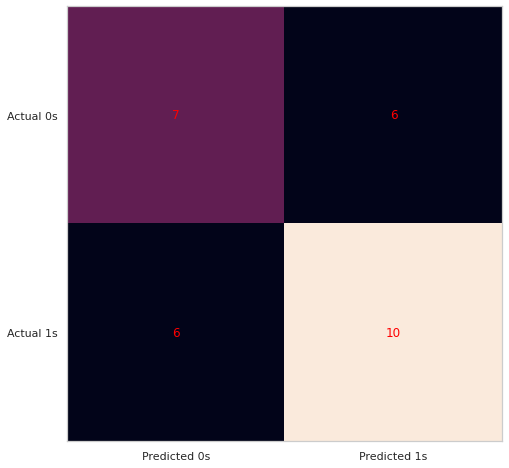

The score of the modle  is : 0.5862068965517241


In [ ]:
#Making the confusion matrix 
cm = confusion_matrix(y_test, model.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#Score of the modle 
print("The score of the modle  is : {}".format(model.score(X_test, y_test)))

**Conclusions:**



*  It can be seen that here the percentage of accuracy is higher, so the use of punishment for the use of irrelevant variables along with the use of variables that showed the greatest calculations in the previous model led to better results. But these results are still not very good, just a little more than a random guess.
*   From this it can be understood that our data does not allow us to predict the marital status of the students. A different dataset or extension of the original dataset is required to allow it to be predicted.


